## Classes
1.1 Round
1.2 Features or Disk
1.3 Star or Artifact
2.1 Edge-on disk
2.2 Not edge-on disk
3.1 Central bar
3.2 No central bar
4.1 Spiral arm
4.2 No spiral arm
5.1 No bulge
5.2 Just noticeable bulge
5.3 Obvious bulge
5.4 Dominant bulge
6.1 Something odd
6.2 Nothing odd
7.1 Round
7.2 In-between
7.3 Cigar shaped
8.1 Ring
8.2 Lens or arc
8.3 Disturbed
8.4 Irregular
8.5 Other
8.6 Merger
8.7 Dust lane
9.1 Rounded central bulge
9.2 Boxy central bulge
9.3 No central bulge
10.1 Tightly wound spiral arms
10.2 Medium wound spiral arms
10.3 Loosely wound spiral arms
11.1 One Spiral arm
11.2 Two spiral arms
11.3 Three spiral arms
11.4 Four spiral arms
11.5 More than four spiral arms
11.6 Can't tell

![classification_decision_tree](classification_decision_tree.png)
<div style="text-align:center;font-size:80%"> <a href= ''></a></div>

![classification_flowchart](classification_flowchart.png)
<div style="text-align:center;font-size:80%"> <a href= ''></a></div>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import pandas
import pandas as pd

# Read the data file
data = pd.read_csv('training_solutions_rev1.csv')

# Display the first few rows
data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [3]:
# Get records containing any missing values
data[data.isnull().any(axis=1)]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6


In [4]:
# Display dataset summary statistics
data.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,...,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000
mean,550179.708337,0.432526,0.542261,0.025213,0.106408,0.435854,0.102526,0.333328,0.215629,0.220224,...,0.032780,0.091801,0.083969,0.039859,0.015411,0.094338,0.017587,0.007603,0.007006,0.073683
std,258724.130197,0.283517,0.296429,0.037967,0.212505,0.301867,0.177301,0.247675,0.285502,0.179835,...,0.098200,0.145125,0.139840,0.099657,0.052285,0.193920,0.067476,0.037678,0.037280,0.107454
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327874.250000,0.175812,0.280862,0.000000,0.000000,0.168490,0.000000,0.122592,0.000000,0.072656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551933.000000,0.416994,0.558754,0.014870,0.000000,0.394850,0.000000,0.289248,0.092987,0.183640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,773232.000000,0.679182,0.811339,0.034325,0.085161,0.694615,0.134555,0.516800,0.330231,0.338920,...,0.000000,0.147239,0.127381,0.030621,0.000000,0.098670,0.000000,0.000000,0.000000,0.128798
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.957937,...,0.901991,0.949733,0.877393,0.996952,0.886363,1.000000,0.975913,0.957000,0.938881,0.753082


In [5]:
classdf = data.copy()

In [6]:
ring_df = classdf[['GalaxyID', 'Class8.1']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
ring_df = ring_df[ring_df['Class8.1'] > 0.7]
ring_df['Label'] = 'ring'
ring_df.drop('Class8.1', axis=1, inplace=True)
ring_df.shape

(347, 2)

In [7]:
merger_df = classdf[['GalaxyID', 'Class8.6']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
merger_df = merger_df[merger_df['Class8.6'] > 0.65]
merger_df['Label'] = 'merger'
merger_df.drop('Class8.6', axis=1, inplace=True)
merger_df.shape

(343, 2)

In [8]:
spiral_one_arm_df = classdf[['GalaxyID', 'Class11.1']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
spiral_one_arm_df = spiral_one_arm_df[spiral_one_arm_df['Class11.1'] > 0.5]
spiral_one_arm_df['Label'] = 'spiral - one arm'
spiral_one_arm_df.drop('Class11.1', axis=1, inplace=True)
spiral_one_arm_df.shape

(95, 2)

In [9]:
barred_spirals_df = classdf[['GalaxyID', 'Class3.1']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
barred_spirals_df = barred_spirals_df[barred_spirals_df['Class3.1'] > 0.85]
barred_spirals_df['Label'] = 'barred'
barred_spirals_df.drop('Class3.1', axis=1, inplace=True)
barred_spirals_df.shape

(404, 2)

In [10]:
elliptical_df = classdf[['GalaxyID', 'Class1.1', 'Class7.2']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
elliptical_df = elliptical_df[(elliptical_df['Class1.1'] > 0.9) & (classdf['Class7.2'] > 0.8)]
elliptical_df['Label'] = 'elliptical'
elliptical_df.drop(['Class1.1', 'Class7.2'], axis=1, inplace=True)
elliptical_df.shape

(384, 2)

In [11]:
edge_on_disk_df = classdf[['GalaxyID', 'Class2.1']]
#export_csv = ring_df.to_csv(r'/Users/lachlan/Documents/ADACS/Cosmic Machines/Galaxy classification/ring.csv', index = None, header = True)
edge_on_disk_df = edge_on_disk_df[edge_on_disk_df['Class2.1'] > 0.95]
edge_on_disk_df['Label'] = 'edge-on disk'
edge_on_disk_df.drop('Class2.1', axis=1, inplace=True)
edge_on_disk_df.shape

(306, 2)

In [12]:
df = pd.concat([ring_df, merger_df, barred_spirals_df, elliptical_df, edge_on_disk_df], ignore_index=True)
df.shape

(1784, 2)

In [13]:
from fastai.vision import *
from fastai.metrics import error_rate

In [14]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [15]:
#data = ImageDataBunch.from_folder('galaxy_sample', train='.', valid_pct = 0.2, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)
data = ImageDataBunch.from_df(path='.', df=df, folder='images_training_rev1', suffix='.jpg', valid_pct = 0.2, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

In [16]:
print(data.classes)
len(data.classes),data.c

['barred', 'edge-on disk', 'elliptical', 'merger', 'ring']


(5, 5)

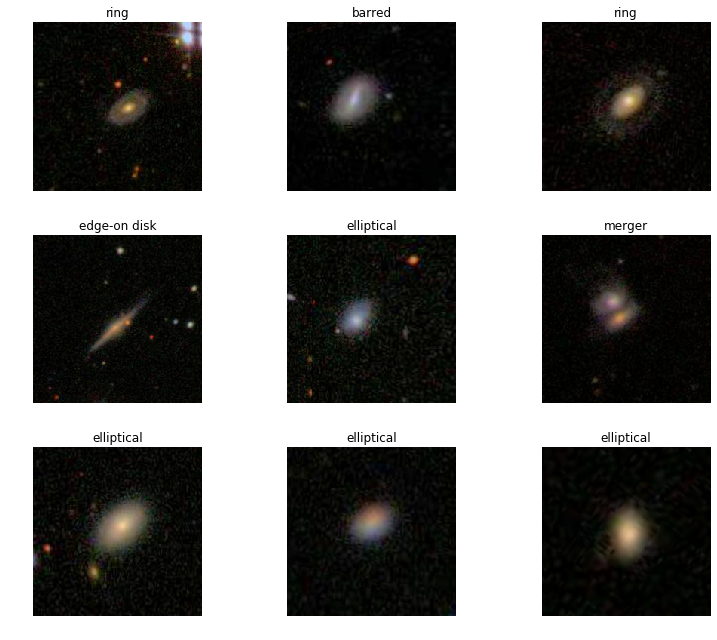

In [17]:
data.show_batch(rows=3, figsize=(11,9))

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.740850,1.144822,0.469101,00:06
1,1.436018,1.013242,0.396067,00:06
2,1.255148,0.990100,0.407303,00:05
3,1.154759,0.964746,0.404494,00:05


In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


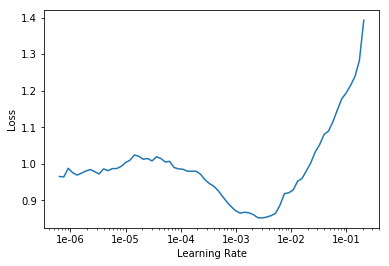

In [23]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.889057,3.864582,0.567416,00:06
1,0.715124,5.308618,0.432584,00:05
2,0.648030,2.587509,0.522472,00:05
3,0.608907,2.373935,0.351124,00:06
4,0.555934,0.949410,0.272472,00:05
5,0.480259,0.793778,0.191011,00:05
6,0.391343,0.393395,0.126404,00:05
7,0.326676,0.348503,0.126404,00:05
8,0.267700,0.250877,0.089888,00:05
9,0.218702,0.257940,0.098315,00:05


In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

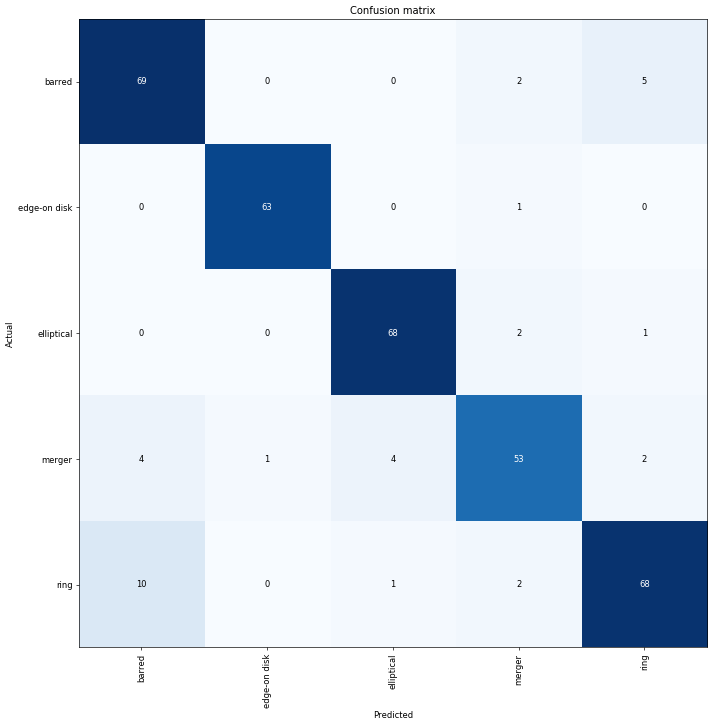

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))